320.0 240.0
np histo =  0.008082
cv2 time =  0.001295
[  7.62109384e-02   1.09010413e-01   1.27864584e-01   1.26289070e-01
   1.23294272e-01   1.17434897e-01   1.05533853e-01   8.68749991e-02
   4.91536446e-02   3.80208343e-02   1.93229169e-02   7.99479149e-03
   4.12760396e-03   2.70833331e-03   1.52343744e-03   1.18489587e-03
   1.09375000e-03   8.20312474e-04   7.42187491e-04   3.38541664e-04
   1.69270832e-04   1.69270832e-04   9.11458337e-05   2.60416673e-05]
1.0
[  7.62109375e-02   1.09010417e-01   1.27864583e-01   1.26289063e-01
   1.23294271e-01   1.17434896e-01   1.05533854e-01   8.09895833e-02
   5.50390625e-02   3.80208333e-02   1.82161458e-02   9.10156250e-03
   4.12760417e-03   2.50000000e-03   1.73177083e-03   1.10677083e-03
   1.08072917e-03   9.11458333e-04   6.77083333e-04   3.90625000e-04
   1.82291667e-04   1.69270833e-04   7.81250000e-05   3.90625000e-05]


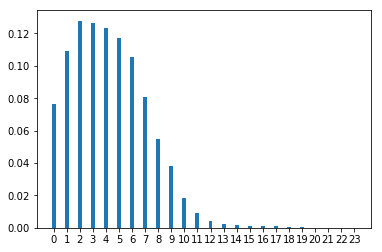

True
<type 'numpy.ndarray'>
(240, 320, 3)
(240, 320)


In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

cap = cv2.VideoCapture('/home2/sb_media/MI_data/hbo/016459N1_2.mov')

w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

print w,h

success, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#plt.imshow(frame[:,:,2], cmap='gray')
#plt.show()

s = time.clock()
hy = np.histogram(frame[:,:,2],bins=24,range=(0,255), density=True)
print "np histo = ",(time.clock() - s)
hy_pmf = hy[0]*255/24


s = time.clock()
cv2_hy = cv2.calcHist([frame],[2],None,[24],[0,256]).reshape(24)
print "cv2 time = ",(time.clock() - s)

print cv2_hy/(w*h)

print np.sum(hy_pmf)
print hy_pmf

x_pos = np.arange(len(hy_pmf))
plt.bar(x_pos, hy_pmf, 0.3)
plt.xticks(x_pos, x_pos)
plt.show()

print success
print type(frame)
print frame.shape
print frame[:,:,0].shape

